# Contained in this Notebook is the code to compute, output and visualize a *similarity matrix*. 

### The matrix assigns a numeric value to the similarity between any two courses in a dataset of training courses.

### First we import the necesary libraries and packges and set a random state (rs).

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

rs = 123

### Next we import the dataset and convert the file into a Pandas DataFrame.

In [2]:
# Read the course dataset
course_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_processed.csv"
course_df = pd.read_csv(course_url)

### Following the creation of the DataFrame, we go through the steps required to generate the similarity matrix.

In [3]:
# Extract the course descriptions
descriptions = course_df['DESCRIPTION']

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Apply the vectorizer to the course descriptions
tfidf_matrix = vectorizer.fit_transform(descriptions)

# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix)

# Convert the similarity matrix to a DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=course_df['COURSE_ID'], columns=course_df['COURSE_ID'])

# Display the similarity matrix
print(similarity_df)

COURSE_ID   ML0201EN  ML0122EN  GPXX0ZG0EN  RP0105EN  GPXX0Z2PEN  CNSC02EN  \
COURSE_ID                                                                    
ML0201EN    1.000000  0.121240    0.034341  0.024630    0.039057  0.060539   
ML0122EN    0.121240  1.000000    0.044635  0.053154    0.037945  0.086094   
GPXX0ZG0EN  0.034341  0.044635    1.000000  0.008209    0.033112  0.025276   
RP0105EN    0.024630  0.053154    0.008209  1.000000    0.003894  0.069804   
GPXX0Z2PEN  0.039057  0.037945    0.033112  0.003894    1.000000  0.050772   
...              ...       ...         ...       ...         ...       ...   
excourse89  0.112650  0.129887    0.021096  0.072068    0.053573  0.076018   
excourse90  0.090302  0.091427    0.033343  0.022435    0.036073  0.016833   
excourse91  0.094166  0.129131    0.075023  0.034472    0.078488  0.046939   
excourse92  0.140272  0.143928    0.025728  0.021417    0.038519  0.035837   
excourse93  0.193917  0.101835    0.017314  0.042400    0.026301

### Lastly, we use *seaborn* to visualize the similarity matrix.

<Axes: xlabel='COURSE_ID', ylabel='COURSE_ID'>

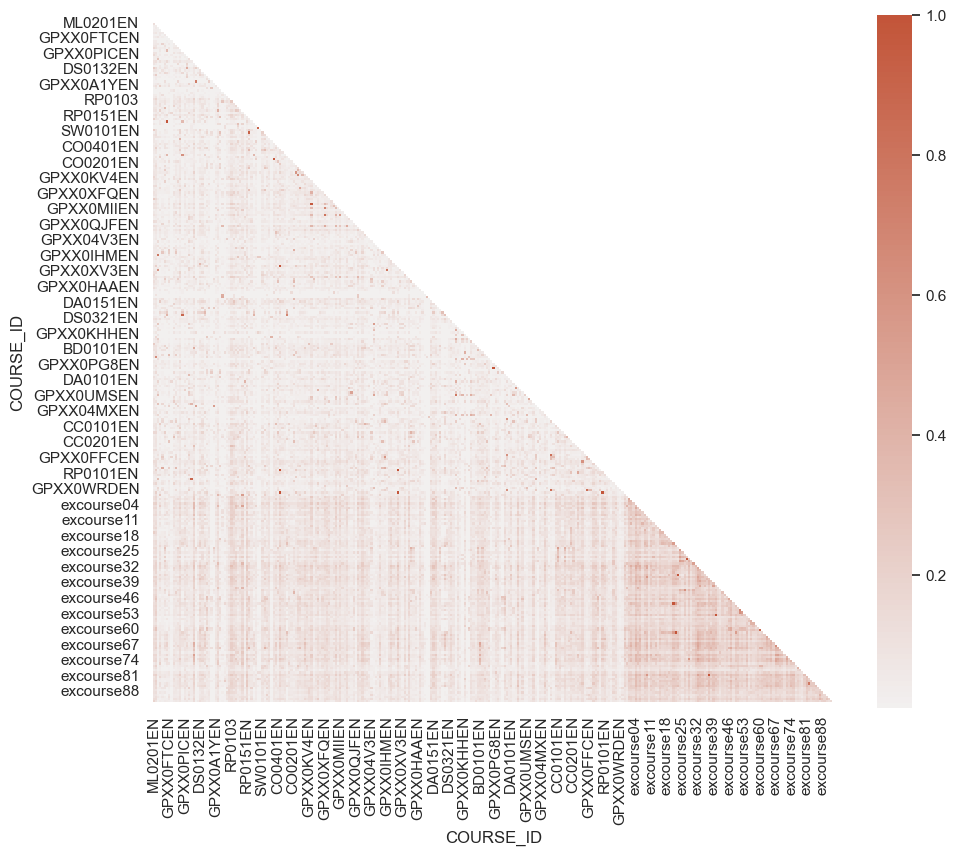

In [4]:
# Configure seaborn
sns.set_theme(style="white")
mask = np.triu(np.ones_like(similarity_df, dtype=bool))
_, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot a similarity heat map
sns.heatmap(similarity_df, mask=mask, cmap=cmap, vmin=0.01, vmax=1, center=0,
            square=True)

### Searching the matrix to find the similarity value between two couses

To facilitate that task we will:
- load the **Bag-of-Words** dataset and convert it to a Pandas DataFrame (bow_df);
- write the function 'get_doc_dicts'
- thtan function will create a new DataFrame - 'grouped_df' - by grouping 'doc_index' and 'doc_id' in 'bow_id';
- manipulate 'grouped_df' to create two dictionaries: an ***index-to-id*** dictionary and an ***id-to-index*** dictionary;
- convert *similarity_df* to a numpy array variable and name it 'sim_matrix';
- create a variable - 'sim' - to store the output of reading two valyes in the sim_matrix.   

In [5]:
# Load the 'Bag-of-Words' dataset and convert it to a Pandas DataFrame (bow_df)
bow_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/courses_bows.csv"
bow_df = pd.read_csv(bow_url)
bow_df.head()

,doc_index,doc_id,token,bow
0,0,ML0201EN,ai,2
1,0,ML0201EN,apps,2
2,0,ML0201EN,build,2
3,0,ML0201EN,cloud,1
4,0,ML0201EN,coming,1


In [6]:
# Create doc_id to index and index to course_id mappings
def get_doc_dicts(bow_df):
    grouped_df = bow_df.groupby(['doc_index', 'doc_id']).max().reset_index(drop=False)
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    del grouped_df
    return idx_id_dict, id_idx_dict

In [7]:
idx_id_dict, id_idx_dict = get_doc_dicts(bow_df)
idx1 = id_idx_dict["ML0151EN"]
idx2 = id_idx_dict["ML0101ENv3"]
print(f"Course 1's index is {idx1} and Course 2's index is {idx2}")

Course 1's index is 200 and Course 2's index is 158


In [8]:
sim_matrix = similarity_df.to_numpy()

In [9]:
sim = sim_matrix[idx1][idx2]
sim

0.3476502967996235